<a href="https://colab.research.google.com/github/nabilaaryanti/Clustering/blob/main/Tugas_CLUSTERING_MKB_11180940000059_Nabila_Aryanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing Data

In [1]:
# Import modul pyhton
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [65]:
#memanggil data csv
!mkdir main
!wget -P main/ https://raw.githubusercontent.com/nabilaaryanti/Clustering/main/nilai.csv
nilai = pd.read_csv('main/nilai.csv')


mkdir: cannot create directory ‘main’: File exists
--2021-05-04 16:40:11--  https://raw.githubusercontent.com/nabilaaryanti/Clustering/main/nilai.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446 [text/plain]
Saving to: ‘main/nilai.csv.2’

nilai.csv.2         100%[===================>]     446  --.-KB/s    in 0s      

2021-05-04 16:40:12 (21.5 MB/s) - ‘main/nilai.csv.2’ saved [446/446]



### Cek Data csv

In [66]:
# Mengecek tabel cvs
nilai.head()

,No,Nama,UTS,Tugas,UAS
0,1,Roy,89,90,75
1,2,sintia,90,71,95
2,3,iqbal,70,75,80
3,4,dilan,45,65,59
4,5,ratna,65,75,53


In [67]:
# mengecek baris akhir data
nilai.tail()

,No,Nama,UTS,Tugas,UAS
10,11,justin,45,60,58
11,12,jesika,60,70,72
12,13,ayu,85,90,88
13,14,siska,52,68,55
14,15,reitama,40,60,70


In [68]:
# melihat ukuran data
N, P = nilai.shape
print("Kolom = ", P)
print("Baris = ", N)

Kolom =  5
Baris =  15


In [69]:
# Menghapus variabel No karna hanya index
nilai.drop("No", axis=1, inplace=True)

### Koreksi variabel

In [70]:
# Tipe variabel
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    15 non-null     object
 1   UTS     15 non-null     int64 
 2   Tugas   15 non-null     int64 
 3   UAS     15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 608.0+ bytes


In [71]:
# Mengecek data duplikat
print(nilai.shape)
nilai.duplicated().sum()

(15, 4)


0

Tidak ada data yang duplikat

In [72]:
# Cek Missing value
print(nilai.isnull().sum())

Nama     0
UTS      0
Tugas    0
UAS      0
dtype: int64


### Uji Korelasi

In [73]:
# Statistika Deskriptif
nilai.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nama,15,15,rudi,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UTS,15,NaN,NaN,NaN,69.1333,18.6121,40,56,70,87,96
Tugas,15,NaN,NaN,NaN,73.1333,11.6856,55,66.5,70,80,93
UAS,15,NaN,NaN,NaN,71.1333,13.8918,48,58.5,73,80.5,95


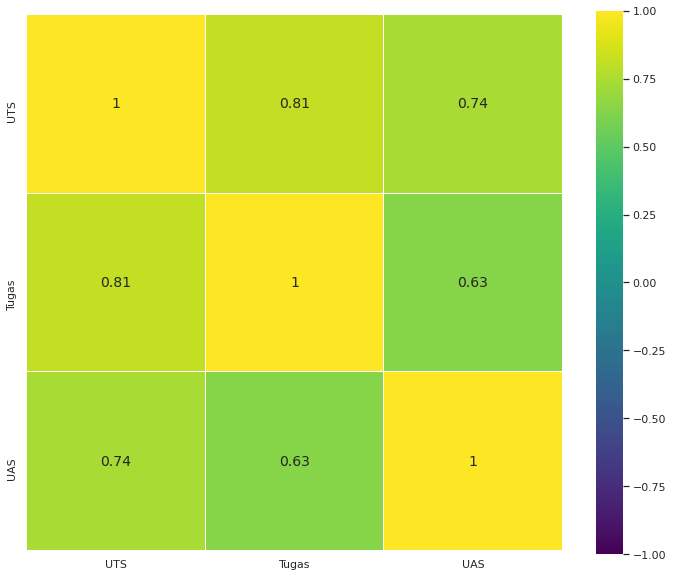

In [74]:
# Korelasi data
nilai.corr()
corr2 = nilai.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

nilai UTS, Tugas dan UAS ketiganya saling berpengaruh

### Visualisasi Data

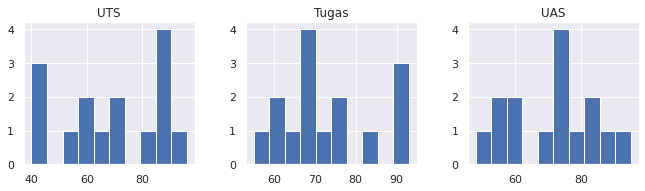

In [75]:
num = nilai.select_dtypes(include = ['int64']).columns
nilai[num].hist(figsize=(15, 6), layout=(2, 4));

## Algoritma K-Means

In [76]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
nilai.head()

,Nama,UTS,Tugas,UAS
0,Roy,89,90,75
1,sintia,90,71,95
2,iqbal,70,75,80
3,dilan,45,65,59
4,ratna,65,75,53


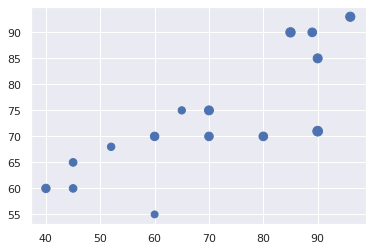

In [78]:
plt.scatter(nilai['UTS'],nilai['Tugas'],nilai['UAS'])

In [79]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
y_predict = km.fit_predict(nilai[['UTS','Tugas','UAS']])
y_predict

array([1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2], dtype=int32)

In [81]:
nilai['Cluster KMeans'] = y_predict
nilai

,Nama,UTS,Tugas,UAS,Cluster KMeans
0,Roy,89,90,75,1
1,sintia,90,71,95,1
2,iqbal,70,75,80,0
3,dilan,45,65,59,2
4,ratna,65,75,53,2
5,merry,80,70,75,0
6,rudi,90,85,81,1
7,hafiz,70,70,73,0
8,gede,96,93,85,1
9,christian,60,55,48,2


In [82]:
km.cluster_centers_

array([[70.        , 71.25      , 75.        ],
       [90.        , 85.8       , 84.8       ],
       [51.16666667, 63.83333333, 57.16666667]])

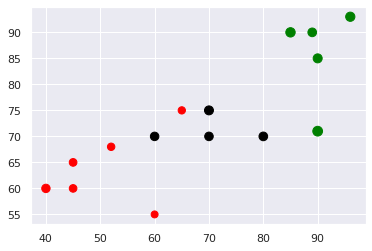

In [22]:
n1 = nilai[nilai.Cluster == 0]
n2 = nilai[nilai.Cluster == 1]
n3 = nilai[nilai.Cluster == 2]

plt.scatter(n1.UTS, n1.Tugas, n1.UAS, color='green')
plt.scatter(n2.UTS, n2.Tugas, n2.UAS, color='red')
plt.scatter(n3.UTS, n3.Tugas, n3.UAS, color='black')

## Algoritma Fuzzy C-Means

In [23]:
pip install fuzzy-c-means

In [85]:
import sys
sys.path.insert(0,'FuzzyCM')
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

In [41]:
nilai['UTS'] = nilai['UTS'].astype('float64')
nilai['Tugas'] = nilai['Tugas'].astype('float64')
nilai['UAS'] = nilai['UAS'].astype('float64')


In [46]:
X = nilai.iloc[:, 1:4]
X.head()

,UTS,Tugas,UAS
0,89.0,90.0,75.0
1,90.0,71.0,95.0
2,70.0,75.0,80.0
3,45.0,65.0,59.0
4,65.0,75.0,53.0


In [58]:
x = np.array(X)

In [43]:
Y = nilai.iloc[:,-5]
Y.head()

0       Roy
1    sintia
2     iqbal
3     dilan
4     ratna
Name: Nama, dtype: object

In [59]:
fcm = FCM(n_clusters=3, m= 2, max_iter=5, error=0.1)
fcm.fit(x)

In [60]:
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

In [61]:
print(fcm_centers)

[[89.671646 87.2198   83.40643 ]
 [49.372826 63.306717 58.158714]
 [71.56123  71.49846  74.86591 ]]


In [62]:
print(fcm_labels)

[0 0 2 1 1 2 0 2 0 1 1 2 0 1 1]


In [87]:
nilai['Cluster Fuzzy'] = fcm_labels
nilai

,Nama,UTS,Tugas,UAS,Cluster KMeans,Cluster Fuzzy
0,Roy,89,90,75,1,0
1,sintia,90,71,95,1,0
2,iqbal,70,75,80,0,2
3,dilan,45,65,59,2,1
4,ratna,65,75,53,2,1
5,merry,80,70,75,0,2
6,rudi,90,85,81,1,0
7,hafiz,70,70,73,0,2
8,gede,96,93,85,1,0
9,christian,60,55,48,2,1


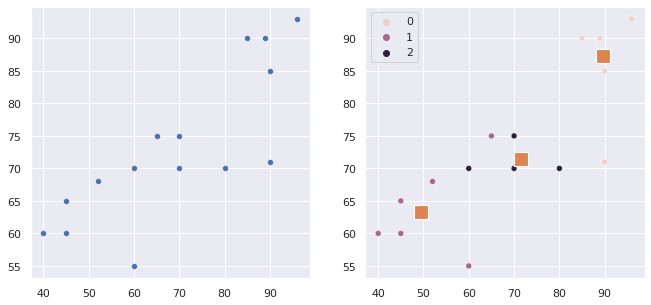

In [86]:
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(x[:,0], x[:,1], ax=axes[0])
scatter(x[:,0], x[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()